In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1

In [49]:
noisysine_data = np.array(pd.read_csv("../Datasets/noisysine.csv"))
hydrodynamics_data = np.array(pd.read_csv("../Datasets/hydrodynamics.csv"))

In [50]:
def divide_xy(data):
    x_data = data[:, 0:-1]
    y_data = data[:, -1]
    return (x_data, y_data)

noisysine_x, noisysine_y = divide_xy(noisysine_data)
hydrodynamics_x, hydrodynamics_y = divide_xy(hydrodynamics_data)

In [51]:
from sklearn.model_selection import train_test_split
noisysine_train_x, noisysine_valid_x, noisysine_train_y, noisysine_valid_y = train_test_split(noisysine_x, noisysine_y, test_size=0.2)
hydrodynamics_train_x, hydrodynamics_valid_x, hydrodynamics_train_y, hydrodynamics_valid_y = train_test_split(hydrodynamics_x, hydrodynamics_y, test_size=0.2)

In [31]:
def r2_score(true_y, pred_y):
    u = sum([(true_y[i] - pred_y[i]) ** 2 for i in range(len(true_y))])
    mean_y = sum(true_y) / len(true_y)
    v = sum([(true_y[i] - mean_y) ** 2 for i in range(len(true_y))])
    return 1.0 - u / v

def show_curve(data_x, data_y, pred_y):
    ids = np.argsort(data_x, axis=0)
    plt.scatter(data_x[ids].reshape(data_x.shape), data_y[ids].reshape(data_y.shape), color='red')
    plt.plot(data_x[ids].reshape(data_x.shape), pred_y[ids].reshape(pred_y.shape))
    plt.show()
    plt.close()

def linear_regression(data_x, data_y, xs):
    w = np.linalg.inv(data_x.T @ data_x) @ data_x.T @ data_y
    return xs @ w

from sklearn.preprocessing import PolynomialFeatures

def polynomial_features(xs, degree):
    return PolynomialFeatures(degree).fit_transform(xs)

In [32]:
def regression(train_x, train_y, valid_x, degree):
    train_x = polynomial_features(train_x, degree)
    valid_x = polynomial_features(valid_x, degree)
    return linear_regression(train_x, train_y, valid_x)

noisysine dataset:
For degree=1 r2_score=0.26547101327776534


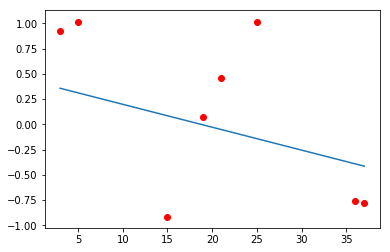

For degree=2 r2_score=0.2407927441441109


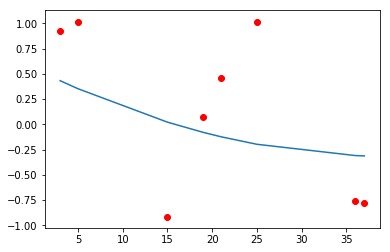

For degree=3 r2_score=0.43037688502650007


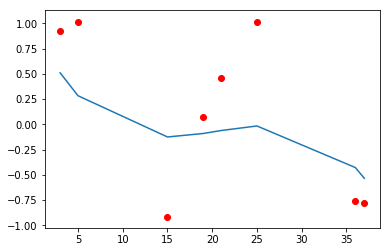

For degree=4 r2_score=0.40297058824716103


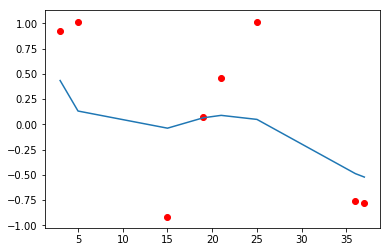

For degree=5 r2_score=0.8717245482227793


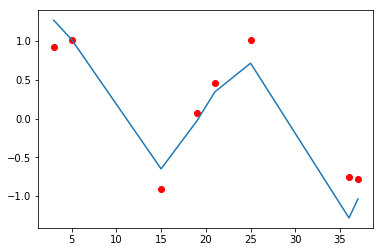

In [34]:
print("noisysine dataset:")
for degree in [1, 2, 3, 4, 5]:
    pred_y = regression(noisysine_train_x, noisysine_train_y, noisysine_valid_x, degree)
    print("For degree="+str(degree)+" r2_score=" + str(r2_score(noisysine_valid_y, pred_y)))
    show_curve(noisysine_valid_x, noisysine_valid_y, pred_y)

In [36]:
print("hydrodynamics dataset:")
for degree in [1, 2]:
    pred_y = regression(hydrodynamics_train_x, hydrodynamics_train_y, hydrodynamics_valid_x, degree)
    print("For degree="+str(degree)+" r2_score=" + str(r2_score(hydrodynamics_valid_y, pred_y)))

hydrodynamics dataset:
For degree=1 r2_score=0.6184499672861512
For degree=2 r2_score=0.9160845360211668


# Task 2

In [52]:
def ridge_regression(data_x, data_y, xs, alpha):
    w = np.linalg.inv(data_x.T @ data_x + alpha * np.identity(data_x.shape[1])) @ data_x.T @ data_y
    return xs @ w

def regression(train_x, train_y, valid_x, valid_y, degree):
    train_x = polynomial_features(train_x, degree)
    valid_x = polynomial_features(valid_x, degree)
    alphas = [0.1 ** i for i in range(10)]
    scores = []
    for i in range(len(alphas)):
        pred_y = ridge_regression(train_x, train_y, valid_x, alphas[i])
        scores.append(r2_score(valid_y, pred_y))
    scores = np.array(scores)
    return (ridge_regression(train_x, train_y, valid_x, alphas[scores.argmax()]), alphas[scores.argmax()])

noisysine dataset:
For degree=1 r2_score=-0.06261113898178339
best alpha=1.0000000000000005e-09


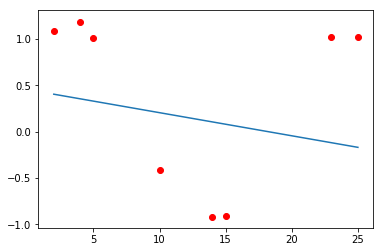

For degree=2 r2_score=-0.07439629611838328
best alpha=1.0000000000000005e-09


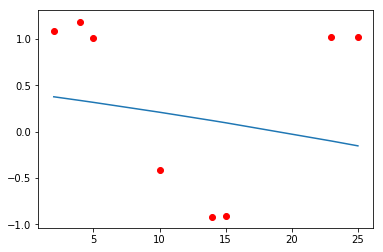

For degree=3 r2_score=0.12251112896414607
best alpha=1.0000000000000005e-09


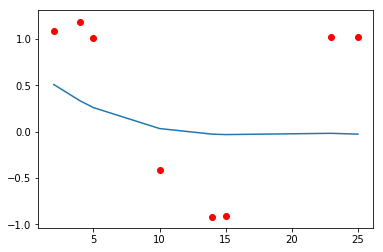

For degree=4 r2_score=0.06717147449792416
best alpha=1.0000000000000005e-09


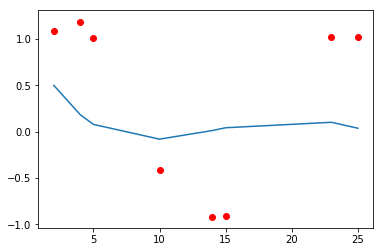

For degree=5 r2_score=0.9006812790357195
best alpha=1.0000000000000005e-09


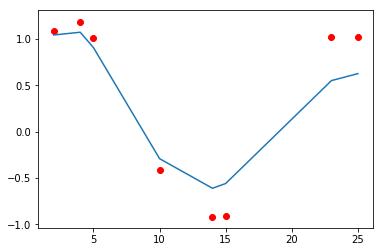

In [53]:
print("noisysine dataset:")
for degree in [1, 2, 3, 4, 5]:
    pred_y, alpha = regression(noisysine_train_x, noisysine_train_y, noisysine_valid_x, noisysine_valid_y, degree)
    print("For degree="+str(degree)+" r2_score=" + str(r2_score(noisysine_valid_y, pred_y)))
    print("best alpha=" + str(alpha))
    show_curve(noisysine_valid_x, noisysine_valid_y, pred_y)

In [54]:
print("hydrodynamics dataset:")
for degree in [1, 2]:
    pred_y, alpha = regression(hydrodynamics_train_x, hydrodynamics_train_y, hydrodynamics_valid_x, hydrodynamics_valid_y, degree)
    print("For degree="+str(degree)+" r2_score=" + str(r2_score(hydrodynamics_valid_y, pred_y)))
    print("best alpha=" + str(alpha))

hydrodynamics dataset:
For degree=1 r2_score=0.6083128711381738
best alpha=0.1
For degree=2 r2_score=0.9190571979948386
best alpha=0.0010000000000000002


# Task 3

In [84]:
from sklearn import linear_model

def lasso_regression(data_x, data_y, xs, alpha):
    model = linear_model.Lasso(alpha=alpha, max_iter=3e4)
    model.fit(data_x, data_y)
    return model.predict(xs)

def lasso_regression_features(data_x, data_y, alpha):
    model = linear_model.Lasso(alpha=alpha, max_iter=3e4)
    model.fit(data_x, data_y)
    return sum(map(lambda x: 0 if (x == 0) else 1, model.coef_))

def regression(train_x, train_y, valid_x, valid_y, degree):
    train_x = polynomial_features(train_x, degree)
    valid_x = polynomial_features(valid_x, degree)
    alphas = [0.1 ** i for i in range(8)]
    scores = []
    for i in range(len(alphas)):
        pred_y = lasso_regression(train_x, train_y, valid_x, alphas[i])
        scores.append(r2_score(valid_y, pred_y))
    scores = np.array(scores)
    return (lasso_regression(train_x, train_y, valid_x, alphas[scores.argmax()]), alphas[scores.argmax()], lasso_regression_features(train_x, train_y, alphas[scores.argmax()]))

noisysine dataset:
For degree=1 r2_score=-0.0626111417366928
best alpha=1.0000000000000004e-07
used features=1


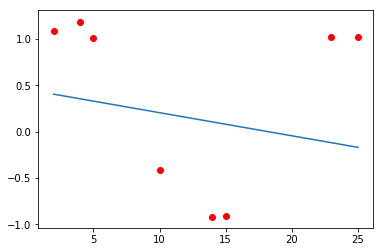

For degree=2 r2_score=-0.07436954586716693
best alpha=0.00010000000000000002
used features=2


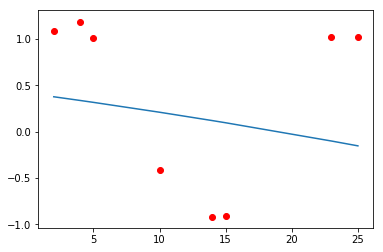

For degree=3 r2_score=0.12251100762557776
best alpha=1.0000000000000004e-07
used features=3


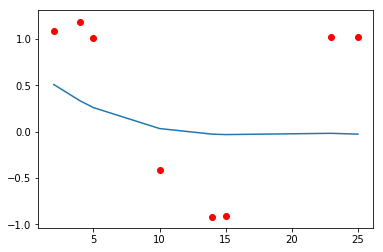

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

For degree=4 r2_score=0.06944490622427635
best alpha=1.0000000000000004e-07
used features=4


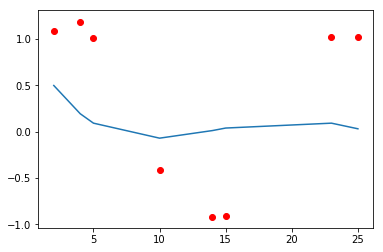

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

For degree=5 r2_score=0.20396430693441903
best alpha=1.0000000000000004e-07
used features=5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


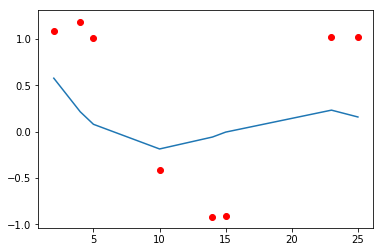

In [85]:
print("noisysine dataset:")
for degree in [1, 2, 3, 4, 5]:
    pred_y, alpha, features = regression(noisysine_train_x, noisysine_train_y, noisysine_valid_x, noisysine_valid_y, degree)
    print("For degree="+str(degree)+" r2_score=" + str(r2_score(noisysine_valid_y, pred_y)))
    print("best alpha=" + str(alpha))
    print("used features=" + str(features))
    show_curve(noisysine_valid_x, noisysine_valid_y, pred_y)

In [86]:
print("hydrodynamics dataset:")
for degree in [1, 2]:
    pred_y, alpha, features = regression(hydrodynamics_train_x, hydrodynamics_train_y, hydrodynamics_valid_x, hydrodynamics_valid_y, degree)
    print("For degree="+str(degree)+" r2_score=" + str(r2_score(hydrodynamics_valid_y, pred_y)))
    print("best alpha=" + str(alpha))
    print("used features=" + str(features))

hydrodynamics dataset:
For degree=1 r2_score=0.6124076956421436
best alpha=0.1
used features=2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

For degree=2 r2_score=0.9207446384182152
best alpha=0.0010000000000000002
used features=17


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Task 4

In [87]:
tsp_data = np.array(pd.read_csv("../Datasets/tsp.csv"))
tsp_data = tsp_data[:, 1:]

In [130]:
def dist(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def length(data, order):
    result = 0
    for i in range(1, len(order)):
        prev = order[i - 1]
        nxt = order[i]
        result += dist(data[prev], data[nxt])
    return result

def draw_route(data, order):
    plt.scatter(data[:, 0], data[:, 1], color='red')
    xs = []
    ys = []
    xs.append(data[order[0]][0])
    ys.append(data[order[0]][1])
    for i in range(1, len(order)):
        prev = order[i - 1]
        nxt = order[i]
        xs.append(data[prev][0])
        ys.append(data[nxt][1])
        xs.append(data[nxt][0])
        ys.append(data[nxt][1])
        
    plt.plot(xs, ys)
    plt.show()
    plt.close()

def run(data, optimizer, name):
    print(name + ":")
    order = optimizer(data)
    print("Total length = " + str(length(data, order)))
    draw_route(data, order)

In [151]:
def monte_carlo(data):
    best_order = np.arange(len(data))
    np.random.shuffle(best_order)
    for i in range(3000):
        order = np.arange(len(data))
        np.random.shuffle(order)
        if (length(data, order) < length(data, best_order)):
            best_order = order.copy()
    return best_order

Monte Carlo:
Total length = 28680


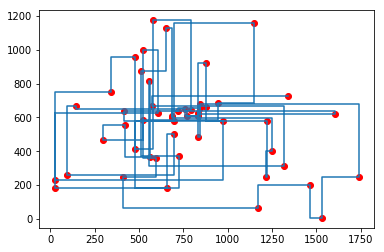

In [152]:
run(tsp_data, monte_carlo, "Monte Carlo")

# Task 5

In [155]:
def swap(order, a, b):
    tmp = order[a]
    order[a] = order[b]
    order[b] = tmp

def random_walk(data):
    best_order = np.arange(len(data))
    np.random.shuffle(best_order)
    order = best_order.copy()
    for i in range(3000):
        a = np.random.randint(0, len(data))
        b = np.random.randint(0, len(data))
        swap(order, a, b)
        if (length(data, order) < length(data, best_order)):
            best_order = order.copy()
        
    return best_order

Random walk:
Total length = 29090


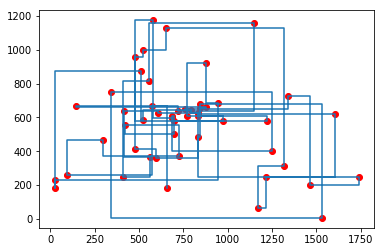

In [156]:
run(tsp_data, random_walk, "Random walk")

# Task 6

In [186]:
def local_hill_climb(data):
    order = np.arange(len(data))
    np.random.shuffle(order)
    
    for i in range(300):
        base = np.random.randint(0, len(order))
        
        for j in range(1, len(order)):
            prev_length = length(data, order)
            swap(order, base, j)
            if (length(data, order) >= prev_length):
                swap(order, base, j)
    return order

Local hill climb:
Total length = 12255


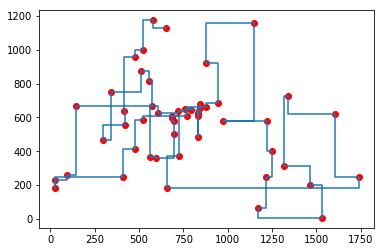

In [187]:
run(tsp_data, local_hill_climb, "Local hill climb")

# Task 7

In [199]:
def simulated_annealing(data):
    order = np.arange(len(data))
    np.random.shuffle(order)
    
    best_order = order.copy()
    
    T_max = 1e6
    T_min = 1e-6
    
    step = 0.98
   
    T = T_max
    
    while (T >= T_min):
        base = np.random.randint(0, len(order))
        
        for j in range(1, len(order)):
            prev_length = length(data, order)
            swap(order, base, j)
            new_length = length(data, order)
            
            diff = new_length - prev_length
            
            if (diff < 0 or np.random.uniform() < np.exp(-diff / T)): # this is fine too
                pass
            else:
                swap(order, base, j)
                
            if (length(data, order) < length(data, best_order)):
                best_order = order.copy()
    
        T = T * step
    return best_order

Simulated annealing:
Total length = 11360


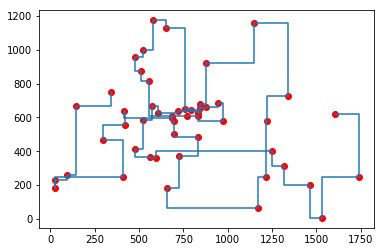

In [200]:
run(tsp_data, simulated_annealing, "Simulated annealing")

# Task 8

In [265]:
# Üçoluk, Göktürk. (2002). Genetic Algorithm Solution of the TSP Avoiding Special Crossover and Mutation. 
# Intelligent Automation and Soft Computing. 3. 10.1080/10798587.2000.10642829. 

def mutate(order):
    order = order.copy()
    swap(order, np.random.randint(0, len(order)), np.random.randint(0, len(order)))
    return order

def to_inversion(order):
    result = np.array([0] * len(order))
    
    for i in range(len(order)):
        for j in range(len(order)):
            if (order[j] == i):
                break
            if (order[j] > i):
                result[i] += 1
                
    return result

def to_order(inversion):
    inversion = inversion.copy()
    
    result = []
    
    used = set()
    
    for it in range(len(inversion)):
        for i in range(len(inversion)):
            if (inversion[i] == 0 and not i in used):
                used.add(i)
                result.append(i)
                
                for j in range(0, i):
                    inversion[j] -= 1
                break
                
    return result

def crossover(a, b):
    a_inv = to_inversion(a)
    b_inv = to_inversion(b)
    
    pos = np.random.randint(0, len(a))
    
    inv1 = []
    inv2 = []
    
    for i in range(len(a)):
        if (i < pos):
            inv1.append(a_inv[i])
            inv2.append(b_inv[i])
        else:
            inv1.append(b_inv[i])
            inv2.append(a_inv[i])
    return [to_order(inv1), to_order(inv2)]

def genetic_algorithm(data):
    order = np.arange(len(data))
    np.random.shuffle(order)
    
    random_order_additions = 10
    generation_size = 20
    generation_count = 5000
    generation = []
    
    for i in range(generation_size):
        order = np.arange(len(data))
        np.random.shuffle(order)
        generation.append((order, length(data, order)))

    for it in range(generation_count):
        old_generation_len = len(generation)
        for i in range(old_generation_len):
            mutation = mutate(generation[i][0])
            generation.append((mutation, length(data, mutation)))
        
        for i in range(1, old_generation_len):
            j = np.random.randint(0, i) # someone better that it
            crossovers = crossover(generation[i][0], generation[j][0])
            generation.append((crossovers[0], length(data, crossovers[0])))
            generation.append((crossovers[1], length(data, crossovers[1])))
        generation.sort(key=lambda x: x[1])
        while (len(generation) > generation_size):
            generation.pop()
        for i in range(random_order_additions):
            order = np.arange(len(data))
            np.random.shuffle(order)
            generation.append((order, length(data, order)))
    return generation[0][0]

Genetic algorithm:
Total length = 10975


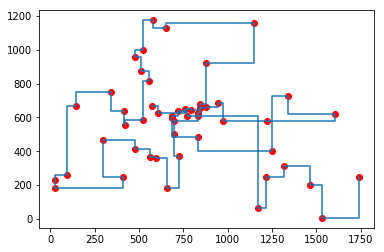

In [255]:
run(tsp_data, genetic_algorithm, "Genetic algorithm")

# 2-OPT

In [263]:
def reverse(order, l, r):
    while (l < r):
        swap(order, l, r)
        l += 1
        r -= 1

def local_hill_climb_2opt(data):
    order = np.arange(len(data))
    np.random.shuffle(order)
    
    for it in range(50):
        for i in range(len(order)):
            for j in range(i + 1, len(order)):
                prev_length = length(data, order)
                
                reverse(order, i, j)
                
                if (length(data, order) > prev_length):
                    reverse(order, i, j)
    return order

2-OPT solver:
Total length = 9630


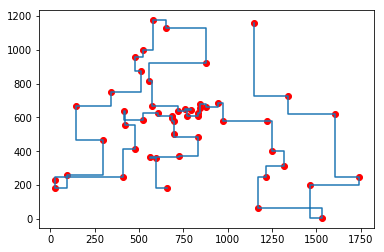

In [264]:
run(tsp_data, local_hill_climb_2opt, "2-OPT solver")

Reverse is better than just swap.